<a href="https://colab.research.google.com/github/Allanizepi/An-lise-explorat-ria-Dataset-Titanic/blob/main/analise_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análise exploratória com os dados sobre o acidente do Transalântico Titanic, naufragado em 1912 com 2223 pessoas a bordo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importação do Dataset Titanic do site: https://www.kaggle.com/datasets/yasserh/titanic-dataset

In [2]:
data = pd.read_csv('Titanic-Dataset.csv')

In [3]:
df = pd.DataFrame(data)

Iniciando a análise dos dados.

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Alguns dados estatísticos para ajudar no entendimento dos dados.

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Verificando valores nulos e realizando o tratamento adequado.

In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [18]:
df = df.loc[df['Age'] != 0]

Apresentação de um gráfico com a distribuição de sobreviventes e não sobreviventes por número de passageiros.

In [19]:
n_sur = (df['Survived'] == 0).sum()
sur = (df['Survived'] == 1).sum()

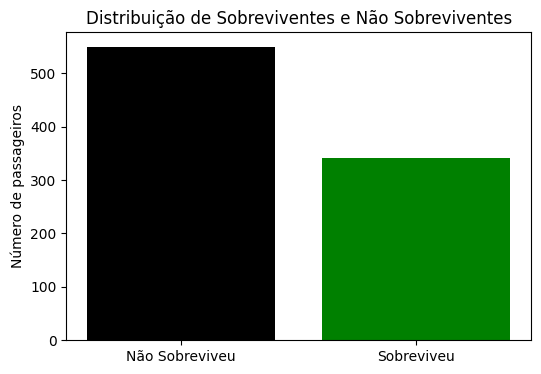

In [33]:

plt.figure(figsize=(6,4))
plt.title('Distribuição de Sobreviventes e Não Sobreviventes')
plt.ylabel('Número de passageiros')
plt.bar(['Não Sobreviveu', 'Sobreviveu'], [n_sur, sur], color=['black','green'])
plt.show()

Apresentado um gráfico em formato de pizza que mostra a veracidade da informação que mulheres tinham prioridade no embarque dos botes salva vidas.

In [21]:
sur_woman = df[(df['Sex'] == 'female') & (df['Survived'] == 1)].shape[0]
sur_man = df[(df['Sex'] == 'male') & (df['Survived'] == 1)].shape[0]

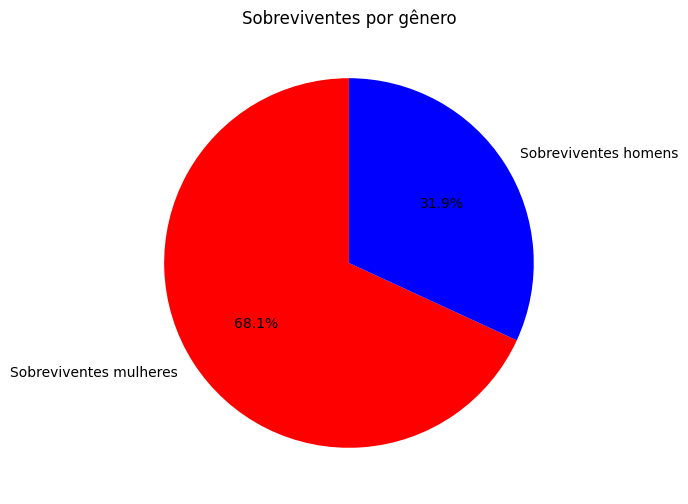

In [22]:
plt.figure(figsize=(6,6))
plt.pie([sur_woman, sur_man], labels=['Sobreviventes mulheres','Sobreviventes homens'], autopct='%1.1f%%', colors=['red','blue'], startangle=90)
plt.title('Sobreviventes por gênero')
plt.show()

No gráfico a seguir, é explicito que quanto pior a classe do tíquete, mais mortos são observados.

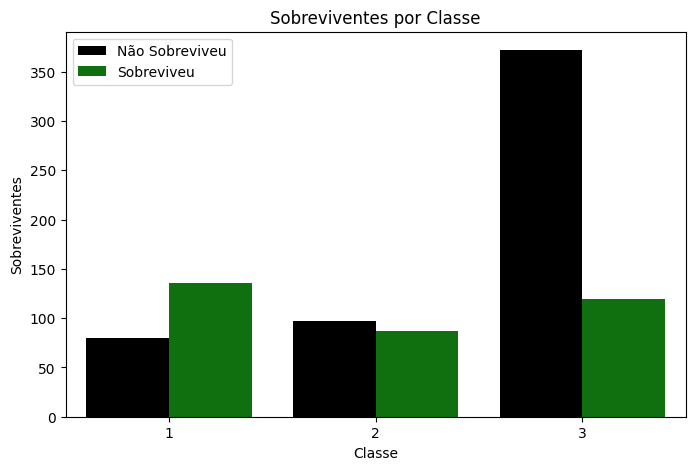

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(x='Pclass', hue='Survived', data=df, palette=['black','green'])
plt.title('Sobreviventes por Classe')
plt.xlabel('Classe')
plt.ylabel('Sobreviventes')
plt.legend(['Não Sobreviveu','Sobreviveu'])
plt.show()

Nesse próximo gráfico é exposto a idade média dos sobreviventes e dos não sobreviventes. Nota-se que são muito próximas, em vista que idosos e crianças tinham preferência no embarque dos botes salva vidas.

In [24]:
mean_age_survive = df.loc[df['Survived'] == 1, 'Age'].mean()
mean_age_nonsurvive = df.loc[df['Survived'] == 0, 'Age'].mean()

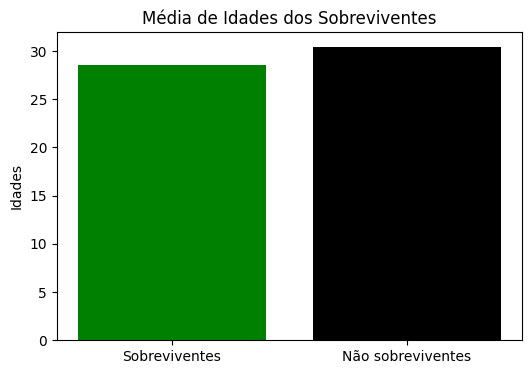

In [25]:
plt.figure(figsize=(6,4))
plt.title('Média de Idades dos Sobreviventes')
plt.ylabel('Idades')
plt.bar(['Sobreviventes', 'Não sobreviventes'], [mean_age_survive,mean_age_nonsurvive], color=['green','black'])
plt.show()

A seguir são apresentados dois gráficos relacionando sobreviventes com familiares a bordo. Nota-se que a partir de três familiares a bordo o índice de não sobreviventes é maior, em vista, que a preocupação com familiares dificultava-se a sobrevivência.

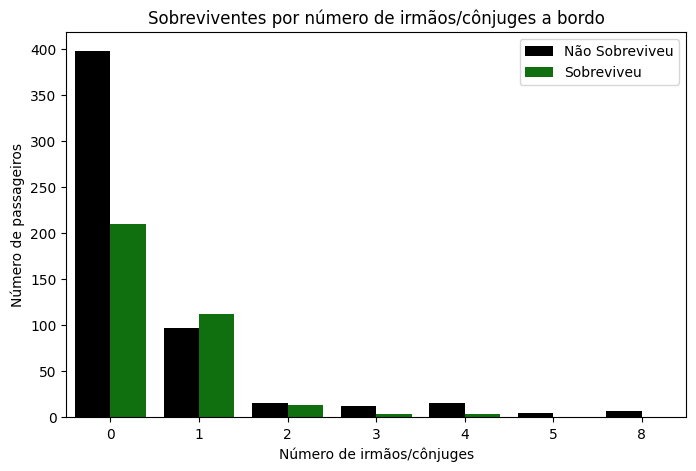

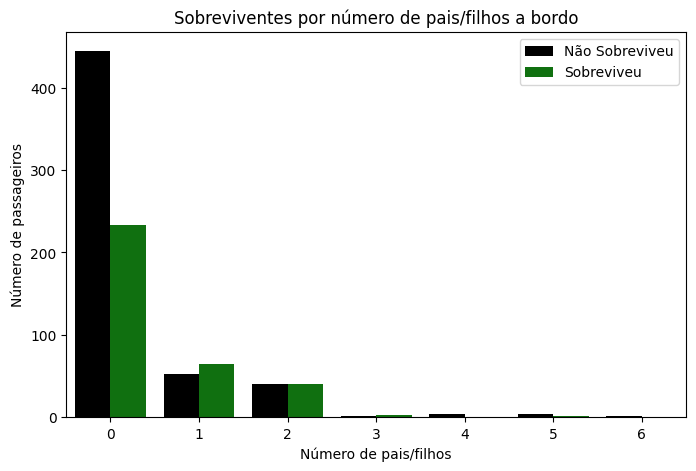

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(x='SibSp', hue='Survived', data=df, palette=['black','green'])
plt.title('Sobreviventes por número de irmãos/cônjuges a bordo')
plt.xlabel('Número de irmãos/cônjuges')
plt.ylabel('Número de passageiros')
plt.legend(['Não Sobreviveu','Sobreviveu'])
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='Parch', hue='Survived', data=df, palette=['black','green'])
plt.title('Sobreviventes por número de pais/filhos a bordo')
plt.xlabel('Número de pais/filhos')
plt.ylabel('Número de passageiros')
plt.legend(['Não Sobreviveu','Sobreviveu'])
plt.show()

Apresentação de um gráfico que explicita a maior taxa de sobrivivêcia ao preço do tíquete, e não importando a idade.  

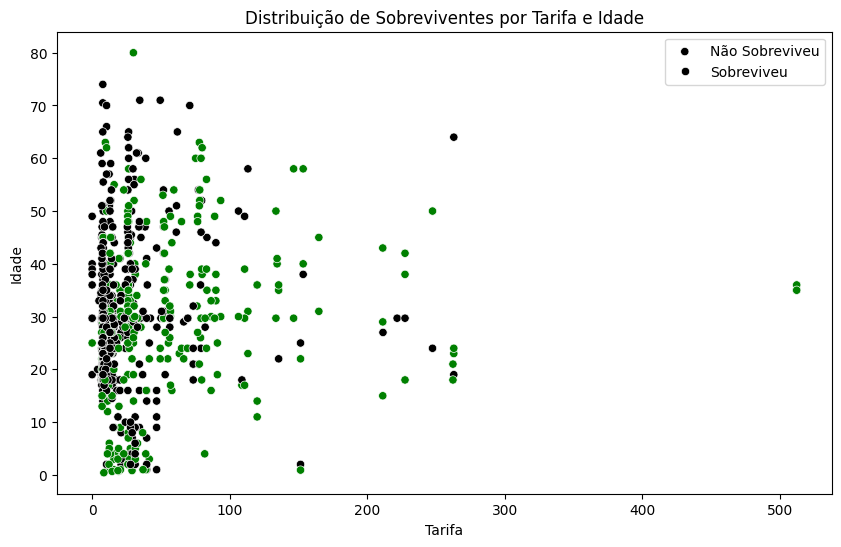

In [53]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Fare',y="Age", hue='Survived', data=df, palette=['black','green'])
plt.title('Distribuição de Sobreviventes por Tarifa e Idade')
plt.xlabel('Tarifa')
plt.ylabel('Idade')
plt.legend(['Não Sobreviveu','Sobreviveu'])
plt.show()